In [1]:
# 1. IMPORTING LIBRARIES 
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models, losses 
import matplotlib.pyplot as plt

In [2]:
# 2. LOAD DATASET 
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data () 
 
# 3. Normalize pixel values to be between 0 and 1 
X_train, X_test = X_train / 255.0, X_test / 255.0 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [4]:
# 4. MODEL BUILDING 
model = models.Sequential () 
 
# ADDING CONVOLUTION AND MAX POOLING LAYERS 
 
# 32 -> number of filters 
# 3, 3 -> kernel size 
# by default stride = 1 
# input_shape = (32 -> image width, 32 -> image height, 3 -> color channel (RGB)) 

model.add(layers.Input(shape=(32,32,3))) 
# Layer 1 
model.add (layers.Conv2D (32, (3, 3), activation = 'relu')) 
# (2, 2) -> matrix size 
model.add (layers.MaxPooling2D ((2, 2))) 
 
# Layer 2 
model.add (layers.Conv2D (64, (3, 3), activation = 'relu')) 
model.add (layers.MaxPooling2D ((2, 2))) 
 
# Layer 3 
model.add (layers.Conv2D (64, (3, 3), activation = 'relu')) 
model.add (layers.MaxPooling2D ((2, 2))) 
 
# Flattening Layer 
model.add (layers.Flatten ()) 
 
# Fully connected layers 
model.add (layers.Dense (128, activation = 'relu')) 
model.add (layers.Dense (256, activation = 'relu')) 

# Output Layer 
model.add (layers.Dense (10, activation = 'softmax')) 
 
# 5. Compiling the model 
model.compile (optimizer = 'adam', loss = losses.SparseCategoricalCrossentropy 
(from_logits = True), metrics=['accuracy']) 

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,810 (487.54 KB)

 Trainable params: 124,810 (487.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 6. Fitting the data to a model 
history = model.fit (X_train, Y_train, epochs = 10, validation_data = (X_test, Y_test)) 
 

Epoch 1/10


C:\Users\Sachin Kansal\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.3480 - loss: 1.7393 - val_accuracy: 0.5071 - val_loss: 1.3822
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5733 - loss: 1.1970 - val_accuracy: 0.6041 - val_loss: 1.1123
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6354 - loss: 1.0282 - val_accuracy: 0.6305 - val_loss: 1.0564
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6746 - loss: 0.9193 - val_accuracy: 0.6538 - val_loss: 0.9907
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7041 - loss: 0.8401 - val_accuracy: 0.6714 - val_loss: 0.9294
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7267 - loss: 0.7736 - val_accuracy: 0.6861 - val_loss: 0.9090
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7479 - loss: 0.7199 - val_accuracy: 0.6965 - val_loss: 0.8881
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7623 - loss: 0.6712 -

313/313 - 2s - 5ms/step - accuracy: 0.7132 - loss: 0.8780


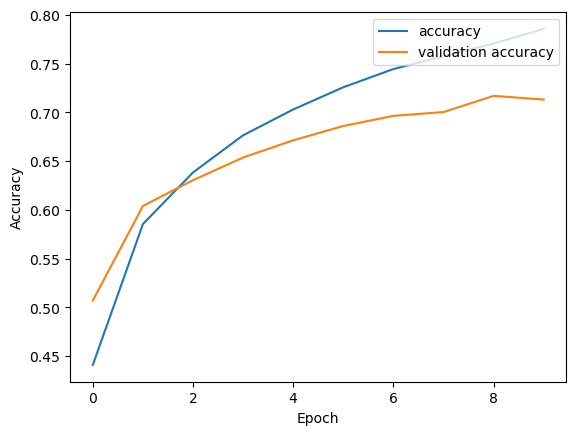

In [7]:
# 7. Model Performance Evaluation 
test_loss, test_accuracy = model.evaluate (X_test, Y_test, verbose = 2) 
 
# 8. Plotting 
plt.plot (history.history['accuracy'], label = 'accuracy') 
plt.plot (history.history['val_accuracy'], label = 'validation accuracy') 
plt.xlabel ('Epoch') 
plt.ylabel ('Accuracy') 
plt.legend (loc = 'upper right') 